## Importing the libraries

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

## Importing the dataset

In [48]:
loan_dataset= pd.read_csv("Loan_status.csv")

In [49]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [50]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
loan_dataset.shape

(614, 13)

In [52]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [53]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
## Droping missing values
loan_dataset= loan_dataset.dropna()
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encoding

In [55]:
loan_dataset.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

In [56]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [57]:
loan_dataset["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [58]:
## Replacing a value of 3+  to 4
loan_dataset= loan_dataset.replace(to_replace='3+',value=4)

In [59]:
loan_dataset["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data Visualiation

AttributeError: 'numpy.int64' object has no attribute 'startswith'

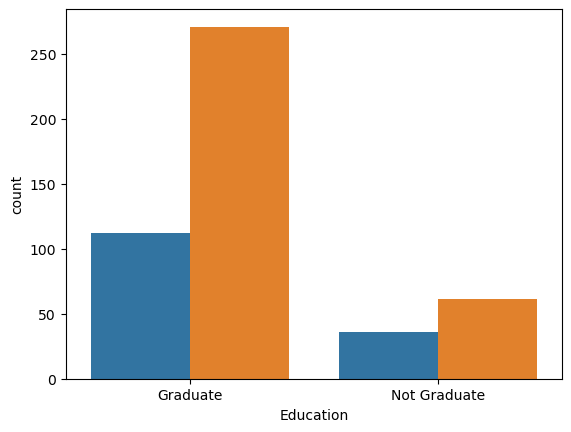

In [60]:
# Education & Loaan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

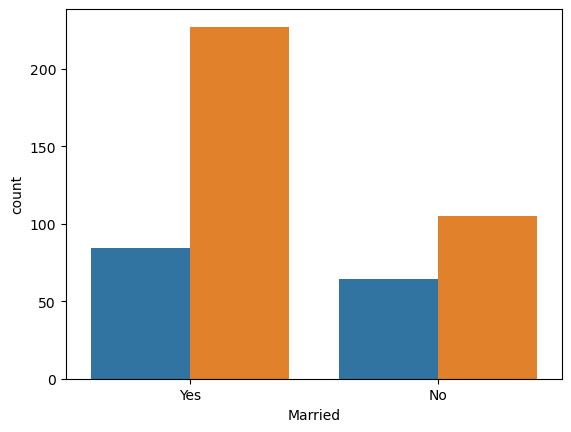

In [61]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [62]:
## Convert categorical data into numerical value
loan_dataset.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},
                      "Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},"Education":{"Not Graduate":0,"Graduate":1}},inplace=True)

In [63]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [64]:
X= loan_dataset.drop(columns=["Loan_ID","Loan_Status"], axis=1)
y= loan_dataset["Loan_Status"]

## Splitting the dataset into the training set and test set

In [65]:
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state = 2)

In [66]:
print(X_train.shape,X_test.shape)

(432, 11) (48, 11)


## Training the SVM model on the training set

In [67]:

classifier= SVC(kernel='linear',random_state = 0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

## Evaluation

In [69]:
X_train_prediction= classifier.predict(X_train)
Training_accuracy= accuracy_score(X_train_prediction,y_train) 

In [70]:
print(Training_accuracy)

0.7986111111111112


In [71]:
X_test_prediction= classifier.predict(X_test)
Test_accuracy= accuracy_score(X_test_prediction,y_test) 

In [73]:
print(Test_accuracy)

0.8333333333333334
